<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [57]:
#ваш код здесь
hh_dz = pd.read_csv('./dst-3.0_16_1_hh_database.csv', sep=';')

In [58]:
# создали копию для дальнейших преобразований
hh = hh_dz.copy()

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [59]:
#ваш код здесь
display(hh.head())
display(hh.tail())

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44739,"Мужчина , 30 лет , родился 17 января 1989",50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,Высшее образование 2015 Московский гуманитарн...,22.04.2019 12:32,Не указано
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,22.04.2019 13:11,Не указано
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [60]:
#ваш код здесь
hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [61]:
#ваш код здесь
hh.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [62]:
#ваш код здесь
def extract_education_level(row):
    """Извлекает уровень образования из строки.

    Аргументы:
    row (str): Строка, содержащая информацию об образовании.

    Возвращаемые значения:
    str: Уровень образования ('высшее', 'неоконченное высшее', 'среднее специальное' или 'среднее').

    Исключения:
    ValueError: Если уровень образования не распознан.
    """
    level = row.split()[0].lower()  # Разбиваем строку по пробелам и берем первое слово в нижнем регистре

    if level == 'высшее':           # Если найдено слово 'высшее'
        return 'высшее'             # Возвращаем 'высшее'
    elif level == 'неоконченное':   # Если найдено слово 'неоконченное'
        return 'неоконченное высшее'  # Возвращаем 'неоконченное высшее'
    elif level == 'среднее':        # Если найдено слово 'среднее'
        return 'среднее специальное' if 'специальное' in row else 'среднее'  # Проверяем наличие слова 'специальное' и возвращаем соответствующий результат
    else:                           # Во всех остальных случаях
        raise ValueError(f'Неправильный уровень образования: {level}')  # Генерируем исключение с сообщением об ошибке

# Применяем функцию к каждому значению в столбце 'Образование и ВУЗ'
hh['Образование'] = hh['Образование и ВУЗ'].apply(extract_education_level)

# Выводим статистику распределения уровней образования
print(hh['Образование'].value_counts())

# Удаляем исходный столбец 'Образование и ВУЗ'
hh.drop('Образование и ВУЗ', axis=1, inplace=True)

Образование
высшее                 33863
среднее специальное     5766
неоконченное высшее     4557
среднее                  558
Name: count, dtype: int64


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [63]:
# Разделяем значения в колонке 'Пол, возраст' на две части по запятой и пробелу
parts = hh['Пол, возраст'].str.split(', ')

# Создаем словарь для замены полных названий пола на сокращения
mapping = {'Мужчина': 'М', 'Женщина': 'Ж'}

# Применяем функцию к каждой строке, чтобы заменить названия пола на их сокращения
hh['Пол'] = parts.apply(lambda x: mapping.get(x[0], x[0]))

# Извлекаем возраст из второй части строки, убирая лишние символы и преобразуя в целое число
hh['Возраст'] = parts.apply(lambda x: int(x[1].strip().split()[0]))

# Выводим процентное соотношение мужчин и женщин
print(hh['Пол'].value_counts(normalize=True))

# Выводим среднее значение возраста
print(hh['Возраст'].mean())

# Удаляем исходную колонку 'Пол, возраст', так как она больше не нужна
hh.drop('Пол, возраст', axis=1, inplace=True)

Пол
Мужчина     0.809293
Женщина     0.190707
Name: proportion, dtype: float64
32.19674146254246


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [64]:
#ваш код здесь
def get_experience(obj_exp):
    """Функция принимает строку obj_exp и возвращает количество месяцев опыта работы."""

    # Преобразуем объект obj_exp в строку
    str_exp = str(obj_exp)

    # Проверка на отсутствие данных ('nan' или 'Не указано')
    if str_exp in ['nan', 'Не указано']:
        return np.nan  # Возвращаем NaN, если данных нет

    # Вспомогательная функция для преобразования пары значений в месяцы
    def get_month_from_pair(first, second):
        """
        Функция принимает два аргумента: first и second.
        Она проверяет, содержит ли второй аргумент слово 'мес'.
        Если да, то возвращается первое число как месяц.
        Иначе первое число умножается на 12 (годы преобразуются в месяцы).
        """
        if 'мес' in second:
            return int(first)  # Если указаны месяцы, возвращаем их как целое число
        else:
            return int(first) * 12  # Если указаны годы, переводим их в месяцы

    # Разделяем строку на части и удаляем лишние пробелы
    splitted = str_exp.removeprefix('Опыт работы ').split('  ')[0].strip().split(' ')

    # Обрабатываем различные форматы входных данных
    try:
        if len(splitted) == 2:
            # Если строка состоит из двух частей (например, "2 года"), возвращаем результат
            return get_month_from_pair(splitted[0], splitted[1])
        else:
            # Если строка состоит из четырех частей (например, "2 года 6 мес."), суммируем оба значения
            return (
                get_month_from_pair(splitted[0], splitted[1])
                + get_month_from_pair(splitted[2], splitted[3])
            )
    except:
        # Если произошла ошибка, выводим сообщение об ошибке и возвращаем NaN
        print(f'Exception string {str_exp}')
        return np.nan


# Применяем функцию get_experience ко всем элементам столбца 'Опыт работы' и сохраняем результат в новый столбец
hh['Опыт работы (месяц)'] = hh['Опыт работы'].apply(get_experience)

hh.drop('Опыт работы', axis=1, inplace=True)

hh['Опыт работы (месяц)'].describe()

count    44574.000000
mean       114.418944
std         79.047861
min          1.000000
25%         57.000000
50%        100.000000
75%        154.000000
max       1188.000000
Name: Опыт работы (месяц), dtype: float64

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [65]:
#ваш код здесь
def get_city(str):
    million_cities = [
        'Новосибирск', 'Екатеринбург','Нижний Новгород',
        'Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону',
        'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград'
        ]
    str = str.split(' ')
    if str[0] == 'Москва':
        return 'Москва'
    elif str[0] == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    elif str[0] in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'

# Создадим функцию для определения готовности к переезду
def get_trip(str):
    str = str.split(',')
    for x in str:
        if re.findall(r'ерее', x) == ['ерее']:
            if ('готов' in x or 'хочу' in x) and ('не готов' not in x):
                return True
            else:
                return False
   
         
# Создадим функцию для определения готовности к командировкам
def get_business_trip(str):
    if 'командировка' in str:
        if (re.findall(r'не готов к командировкам', str) == ['не готов к командировкам']) \
        or (re.findall(r'не готова к командировкам', str) == ['не готова к командировкам']):
            return False
        else:
            return True
    else:
        return False
    
# Создаем новые признаки и проверяем результат
hh['Город'] = hh['Город, переезд, командировки'].apply(get_city)
print(hh['Город'].value_counts())
hh['Готовность к переезду'] = hh['Город, переезд, командировки'].apply(get_trip)
print(hh['Готовность к переезду'].value_counts())
hh['Готовность к командировкам'] = hh['Город, переезд, командировки'].apply(get_business_trip)
print(hh['Готовность к командировкам'].value_counts())


      
mask = (hh['Готовность к командировкам']) & (hh['Готовность к переезду'])
x = round(hh[mask]['Готовность к командировкам'].count() / hh.shape[0]*100)
print(f"К переезду и командировкам готово {x}% соискателей")
x = round(hh['Город'].value_counts(normalize=True)*100)['Санкт-Петербург']
print(f"В Санкт-Петербурге проживает {x}% соискателей")
hh.drop('Город, переезд, командировки', axis=1, inplace=True)


Город
Москва              16621
другие              16452
город-миллионник     6734
Санкт-Петербург      4937
Name: count, dtype: int64
Готовность к переезду
False    28719
True     16025
Name: count, dtype: int64
Готовность к командировкам
True     31640
False    13104
Name: count, dtype: int64
К переезду и командировкам готово 32% соискателей
В Санкт-Петербурге проживает 11.0% соискателей


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [66]:
#ваш код здесь
employments = ['полная занятость', 'частичная занятость',
              'проектная работа', 'волонтерство', 'стажировка']
charts = ['полный день', 'сменный график', 
         'гибкий график', 'удаленная работа',
         'вахтовый метод']
for employment, chart in zip(employments, charts):
    hh[employment] = hh['Занятость'].apply(lambda x: employment in x)
    hh[chart] = hh['График'].apply(lambda x: chart in x)
hh = hh.drop('Занятость', axis=1)
hh = hh.drop('График', axis=1)

#Сколько людей ищут проектную работу и волонтёрство?
print(hh[hh['проектная работа'] & hh['волонтерство']].shape[0])

#Сколько людей хотят работать вахтовым методом и с гибким графиком?
print(hh[hh['вахтовый метод'] & hh['гибкий график']].shape[0])




436
2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [67]:
#ваш код здесь
df_exchange_rates = pd.read_csv('ExchangeRates.csv')

# Преобразуем столбцы с датой обеих таблиц в "datetime":
df_exchange_rates['date'] = pd.to_datetime(df_exchange_rates['date'], dayfirst=True).dt.date
hh['Обновление резюме'] = pd.to_datetime(hh['Обновление резюме'], dayfirst=True).dt.date

# Извлекаем ЗП и наименование валюты из столбца "ЗП", затем создаём два столбца по этим данным:
hh['ЗП_int'] = hh['ЗП'].apply(lambda x: x.split(sep=' ')[0]).astype('int32')

def get_currency(arg):
    """Конвертирует названия валют в стандарт ISO"""
    currency = arg.split(sep=' ')[1]
    name_currency = ['руб.', 'бел.руб.', 'грн.', 'сум']
    ISO_currency = ['RUB', 'BYN', 'UAH', 'UZS']
    for name, ISO_name in zip(name_currency, ISO_currency):
        if currency == name:
            currency = ISO_name
    return currency


hh['Валюта'] = hh['ЗП'].apply(get_currency)

# Объединяем две таблицы по столбцам "date" и "currency":
merged = hh.merge(
    df_exchange_rates,
    left_on=['Валюта', 'Обновление резюме'],
    right_on=['currency', 'date'],
    how='left'
)

# Заполняем пропуски.
# Создаём столбец ЗП в рудлях.
# Выводим медианное значение желаемой ЗП соискателей.
merged['close'] = merged['close'].fillna(1)
merged['proportion'] = merged['proportion'].fillna(1)
hh['ЗП (руб)'] = merged['ЗП_int'] * merged['close'] / merged['proportion']
print(round(hh['ЗП (руб)'].median()))


C:\Users\mpoma\AppData\Local\Temp\ipykernel_32416\4275791611.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_exchange_rates['date'] = pd.to_datetime(df_exchange_rates['date'], dayfirst=True).dt.date


59019


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

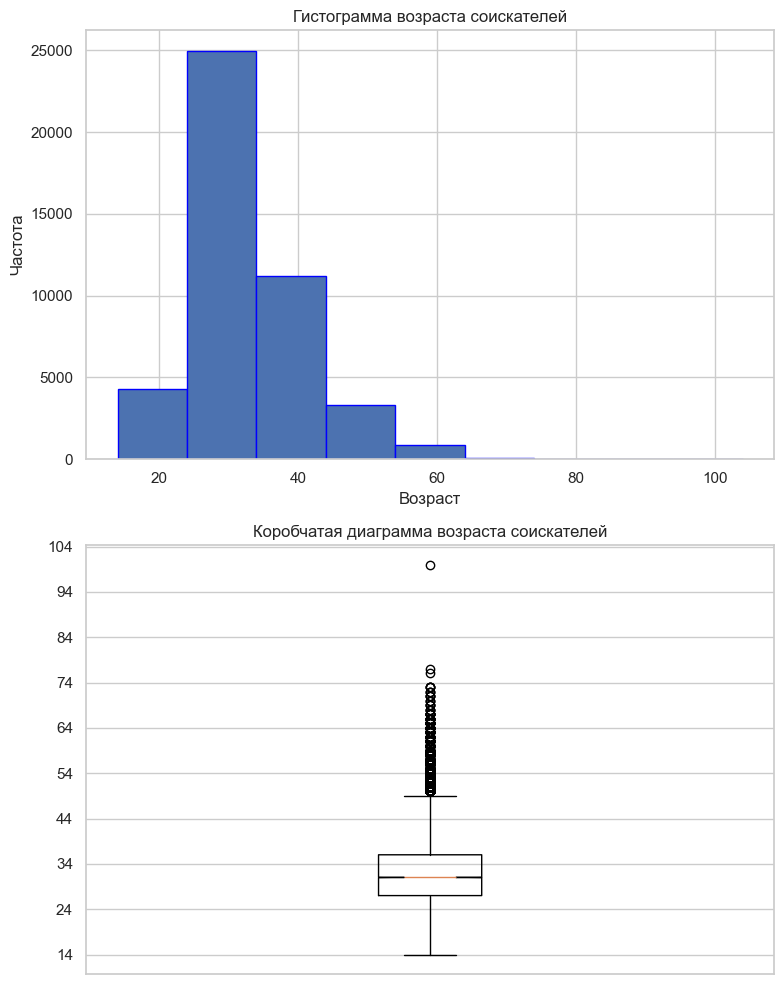

In [68]:
# ваш код здесь
ages = hh['Возраст']
min_age = ages.min()
max_age = ages.max()
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))


# Первая поддиаграмма - гистограмма
ax[0].hist(ages, bins=np.arange(min_age, max_age + 10, 10), edgecolor='blue')
ax[0].set_xlabel('Возраст')
ax[0].set_ylabel('Частота')
ax[0].set_title('Гистограмма возраста соискателей')

# Вторая поддиаграмма - коробчатая диаграмма
ax[1].boxplot(ages, meanline = True, notch = True)
ax[1].set_xticks([])
ax[1].set_title('Коробчатая диаграмма возраста соискателей')
ax[1].set_yticks(np.arange(min_age, max_age + 10, 10))

plt.tight_layout()  # Улучшаем расположение поддиаграмм
plt.show()  # Показываем график

ваши выводы по графику здесь:
1. Мода распределения равна 30
2. Медиана распределения равна 31
3. Возраст соискателей от 14 до 100 лет.
4. Большинству соискателей от 26 до 36 лет.
5. Аномальными значениями являются 77 и 100 лет. 


2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

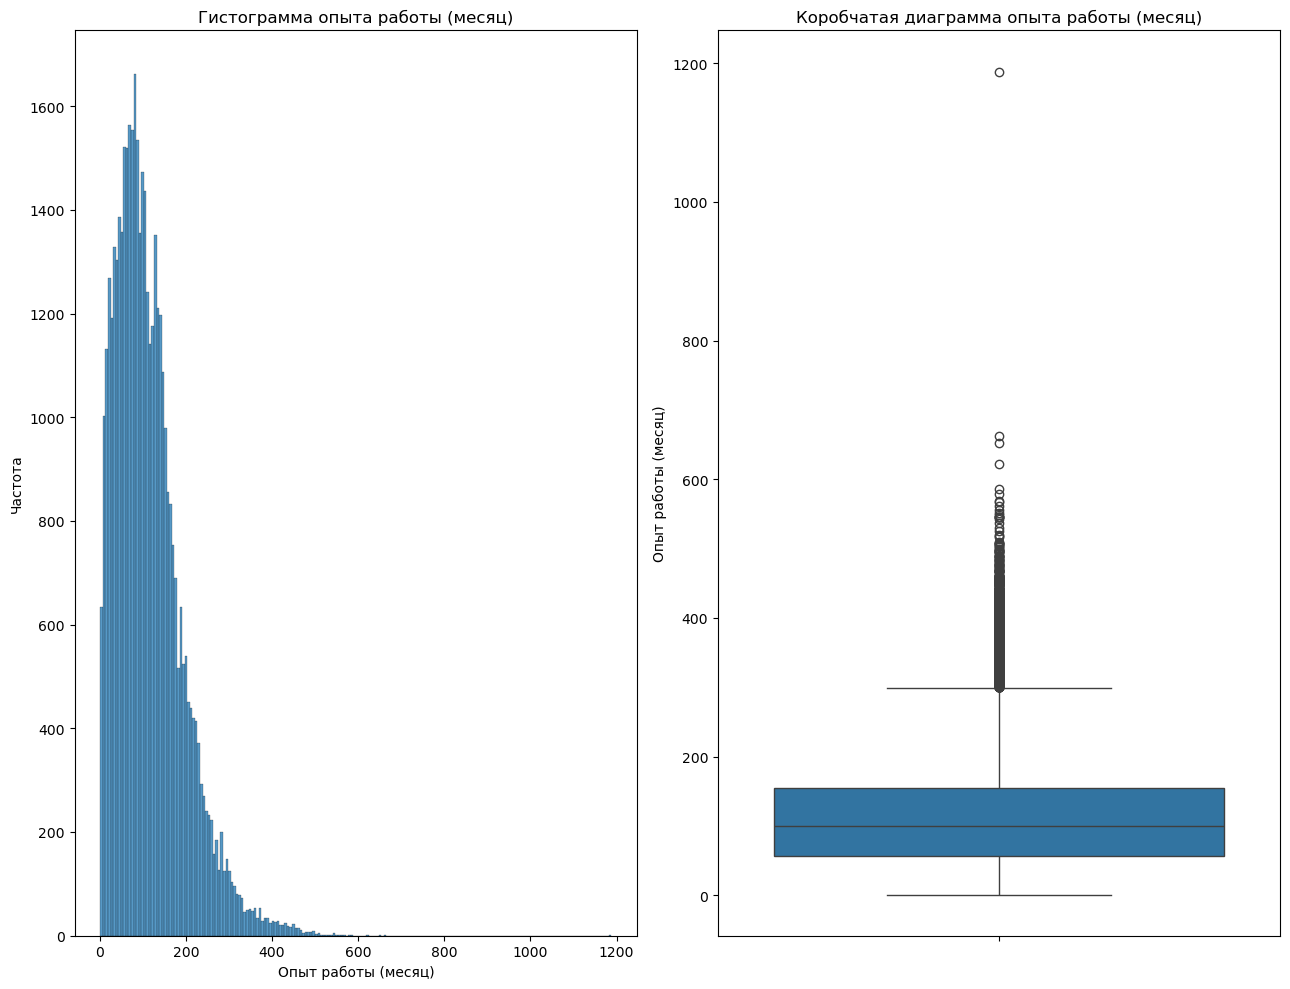

Мода распределения: 81.0
Предельные значения: 1.0 - 1188.0
Интервал, в котором находится опыт работы большинства соискателей: 57.0 - 154.0


In [14]:
# Построение гистограммы и коробчатой диаграммы
plt.figure(figsize=(13, 10))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(hh['Опыт работы (месяц)'], bins = 200)
plt.title('Гистограмма опыта работы (месяц)')
plt.xlabel('Опыт работы (месяц)')
plt.ylabel('Частота')

# Коробчатая диаграмма
plt.subplot(1, 2, 2)
sns.boxplot(y=hh['Опыт работы (месяц)'])
plt.title('Коробчатая диаграмма опыта работы (месяц)')

plt.tight_layout()
plt.show()

# Анализ распределения
mode = hh['Опыт работы (месяц)'].mode()[0]
min_value = hh['Опыт работы (месяц)'].min()
max_value = hh['Опыт работы (месяц)'].max()
q1 = hh['Опыт работы (месяц)'].quantile(0.25)
q3 = hh['Опыт работы (месяц)'].quantile(0.75)
iqr = q3 - q1

# Определение аномалий
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = hh[(hh['Опыт работы (месяц)'] < lower_bound) | (hh['Опыт работы (месяц)'] > upper_bound)]

print(f"Мода распределения: {mode}")
print(f"Предельные значения: {min_value} - {max_value}")
print(f"Интервал, в котором находится опыт работы большинства соискателей: {q1} - {q3}")
age_column = hh['Опыт работы (месяц)']



1. Мода распределения 81 месяц
2. Медианный опыт 100 месяцев
3. Большинство соискателей имеют опыт работы в интервале от 57 до 154 месяцев
4. Аномальным выглядит опыт работы 1188 месяцев (99 лет)

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


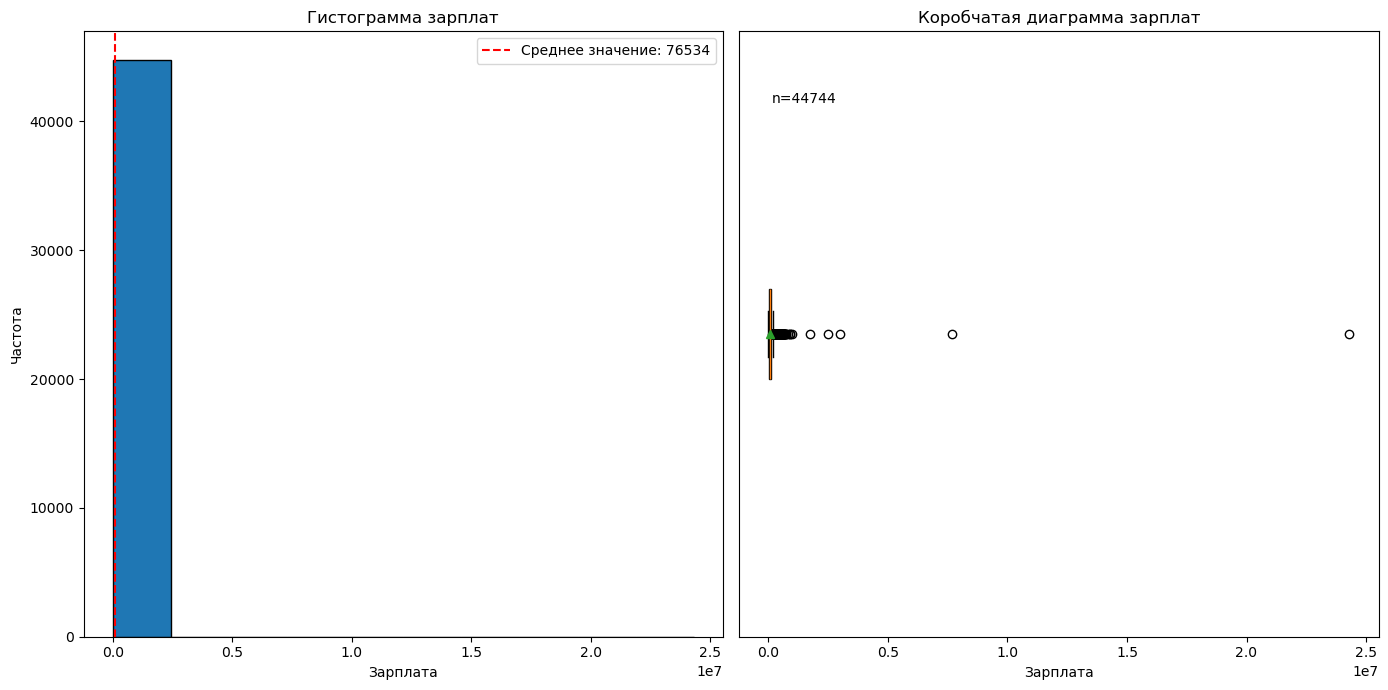

Мода: 50000.0
Минимальная зарплата: 1.0
Максимальная зарплата: 24304876.0


In [15]:
# ваш код здесь
# Настройка графиков
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Гистограмма
axs[0].hist(hh['ЗП (руб)'], bins=10, color=sns.color_palette()[0], edgecolor='black')
axs[0].set_title('Гистограмма зарплат')
axs[0].set_xlabel('Зарплата')
axs[0].set_ylabel('Частота')

# Добавляем среднее значение на гистограмму
mean_salary = hh['ЗП (руб)'].mean()
axs[0].axvline(mean_salary, color='r', linestyle='--', label=f'Среднее значение: {mean_salary:.0f}')
axs[0].legend(loc='upper right')  # Легенда для среднего значения

# Коробчатая диаграмма
axs[1].boxplot(hh['ЗП (руб)'], vert=False, patch_artist=True,
               boxprops={'facecolor': sns.color_palette()[1]}, showmeans=True)
axs[1].set_title('Коробчатая диаграмма зарплат')
axs[1].set_xlabel('Зарплата')
axs[1].set_yticks([])  # Убираем метки оси Y, так как они не нужны

# Добавление количества наблюдений
n_observations = len(hh['ЗП (руб)'])
axs[1].annotate(f'n={n_observations}', xy=(0.05, 0.9), xycoords='axes fraction',
                horizontalalignment='left', verticalalignment='top')

mode = hh['ЗП (руб)'].mode().values[0]

# Минимальная зарплата
min_salary = hh['ЗП (руб)'].min()

# Максимальная зарплата
max_salary = hh['ЗП (руб)'].max()
# Отображение графиков
plt.tight_layout()
plt.show()
print(f"Мода: {mode}")
print(f"Минимальная зарплата: {min_salary}")
print(f"Максимальная зарплата: {max_salary}")


1. Мода равна - 50 000;
2. Медиана равна - 59 019
3. Минимальная желаемая зарплата - 1 руб., максимальная - 24.3 млн. руб.
4. Желаемая ЗП большинства соискателей лежит от 37 до 95 тыс. руб.
5. Аномальные значения - 1 руб., все значения свыше 1 млн. руб. 

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

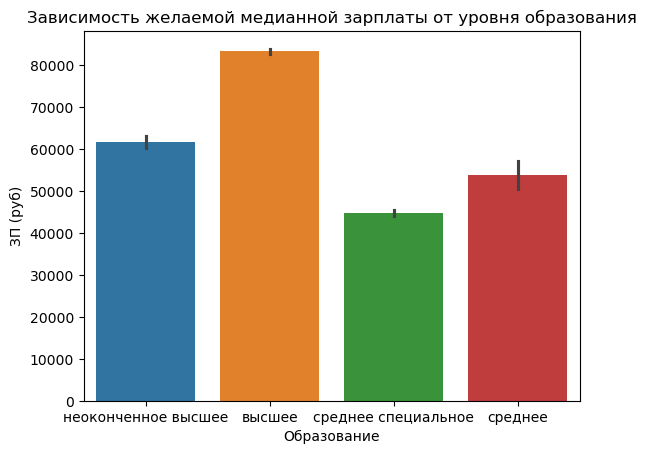

In [16]:
# ваш код здесь
# Фильтруем данные, оставляя только записи с зарплатой менее 1 млн рублей
filtered_hh = hh[hh['ЗП (руб)'] < 1000000]

# Визуализация в seabornplt.figure(figsize=(12, 6))
plt.title("Зависимость желаемой медианной зарплаты от уровня образования")
ax = sns.barplot(
    data=filtered_hh,
    x='Образование',
    y='ЗП (руб)',
    hue='Образование',
)
plt.show()

1. Наименьшее пожелание по зарплате у людей со средним специальным образованием, наивысшее пожелания - у людей с высшим образованием.
2. Уровень образования в целом влиять на зарплатное ожидание кандидатов.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

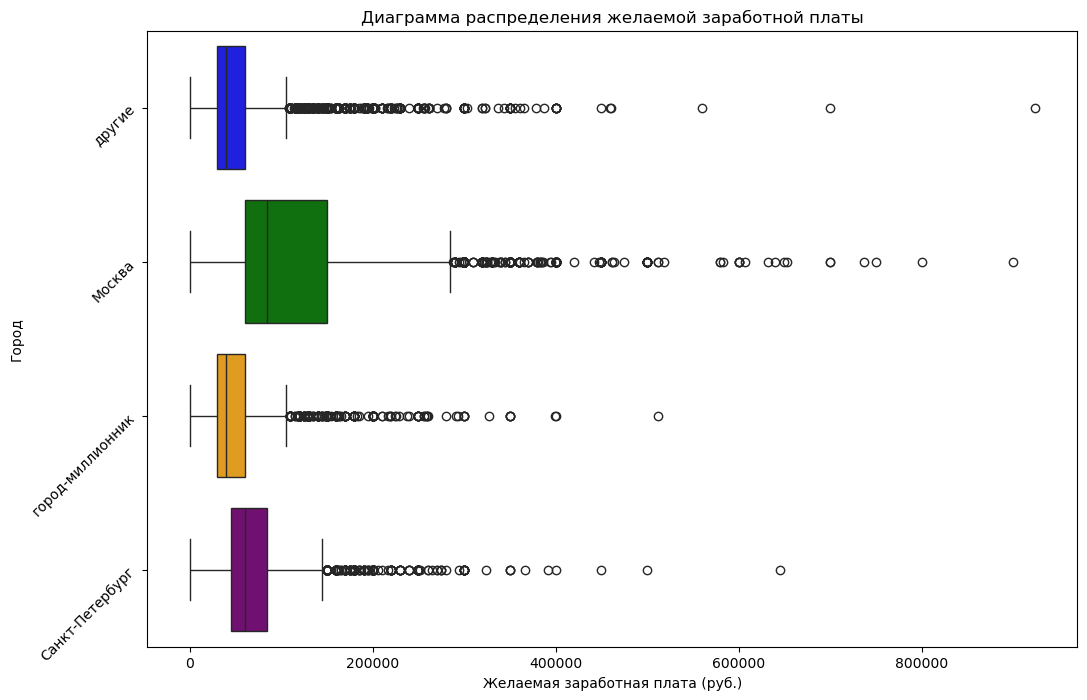

In [17]:
# ваш код здесь

plt.figure(figsize=(12, 8))
colors = ["blue", "green", "orange", "purple"]
sns.boxplot(x='ЗП (руб)', y='Город',orient='h', hue='Город', data=filtered_hh, palette=colors, legend=False)
plt.yticks(rotation=45, ha="right")
plt.title('Диаграмма распределения желаемой заработной платы')
plt.xlabel('Желаемая заработная плата (руб.)')
plt.ylabel('Город')
plt.show()

1. Медиана в Москве выше чем в остальных городах и составляет 85 000, после идет Санкт-Петербург с 60 000. Медиана в других городах и городах-миллиоников равна и составляет 40 000.
2. Наибольший размах по желаемым зарплатам в Москве (от 60 и до 150 тысяч), наименьший - в любом другом городе и в городах миллиониках (от 30 до 60).
3. Можно однозначно сказать, что признак города имеет существенное значение при определении зарплаты

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

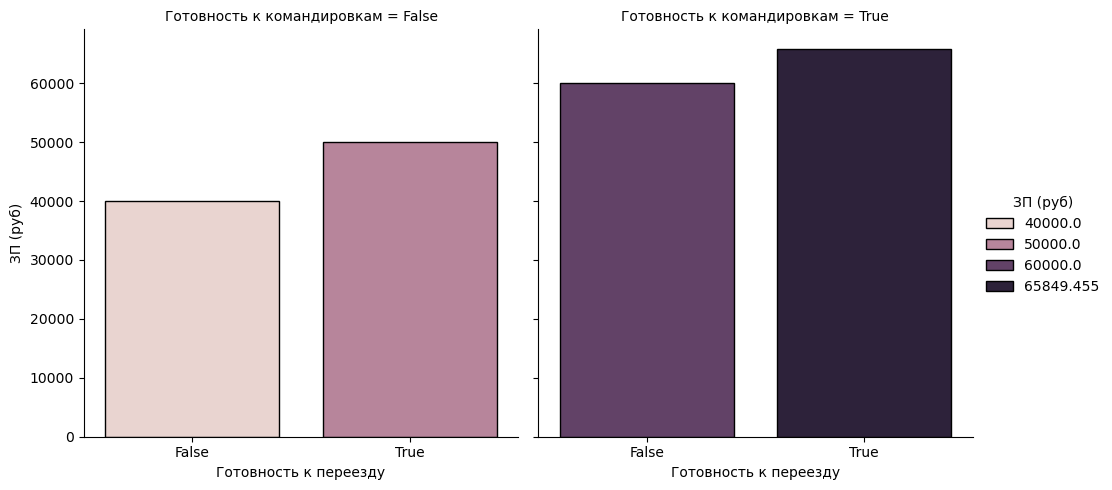

In [18]:
# Осуществить необходимую фильтрацию
rel_hh = hh.groupby(by=['Готовность к командировкам', 'Готовность к переезду'], as_index=False)['ЗП (руб)'].median()
g = sns.catplot(
    data=rel_hh,
    kind='bar',
    x='Готовность к переезду',
    y='ЗП (руб)',
    col='Готовность к командировкам',
    errorbar=None,
    edgecolor="black",
    estimator='sum',
    hue='ЗП (руб)'
)
plt.show()

ваши выводы здесь
1. Согласно графику уровень ожидаемой заработной платы зависит от готовности к переездам и командировкам.
2. Ожидаемая зарплата выше у тех, кто готов к переезду.
3. Командировки тоже влияют на зарплату. У тех кто готов к командировкам - ожидаемая зп выше. 




7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

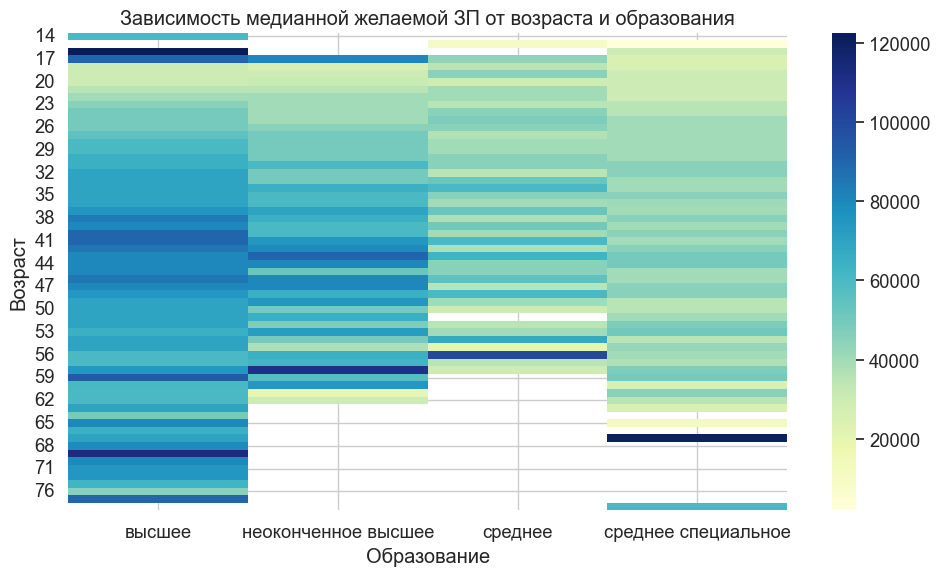

In [19]:
# ваш код здесь
filtered_hh = hh[hh['ЗП (руб)'] < 1000000]

# Создаем сводную таблицу с медианной зарплатой
pivot_table = hh.pivot_table(index="Возраст", columns="Образование", values="ЗП (руб)", aggfunc="median")

# Устанавливаем стиль seaborn
sns.set(style="whitegrid", font_scale=1.2)

# Построение тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, fmt=".0f", cmap="YlGnBu", cbar=True)

# Настройка диаграммы
plt.title("Зависимость медианной желаемой ЗП от возраста и образования")
plt.xlabel("Образование")
plt.ylabel("Возраст")
plt.xticks()
plt.yticks(rotation=360)

# Показываем диаграмму
plt.tight_layout()
plt.show()

1. Самые большие зарплатные ожидания у кандидатов с высшим образованием, самые маленькие - со средним специальным образованием. 
2. Самые высокие зарплатные ожидания (от 80 тысяч) у кандидатов с высшим образованием в возрасте от 38 до 50 лет.
3. Интересным является тот факт, что у кандидатов со средним образованием от 17 до 22 лет зарплатные ожидания выше чем у остальных кандидатов.
4. Аномальными значениями являются высшее образование у соискателей с возрастом от 14 до 17 лет, а также их зарплатные ожидания, а также данные о соискателях старше 80 лет. 

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

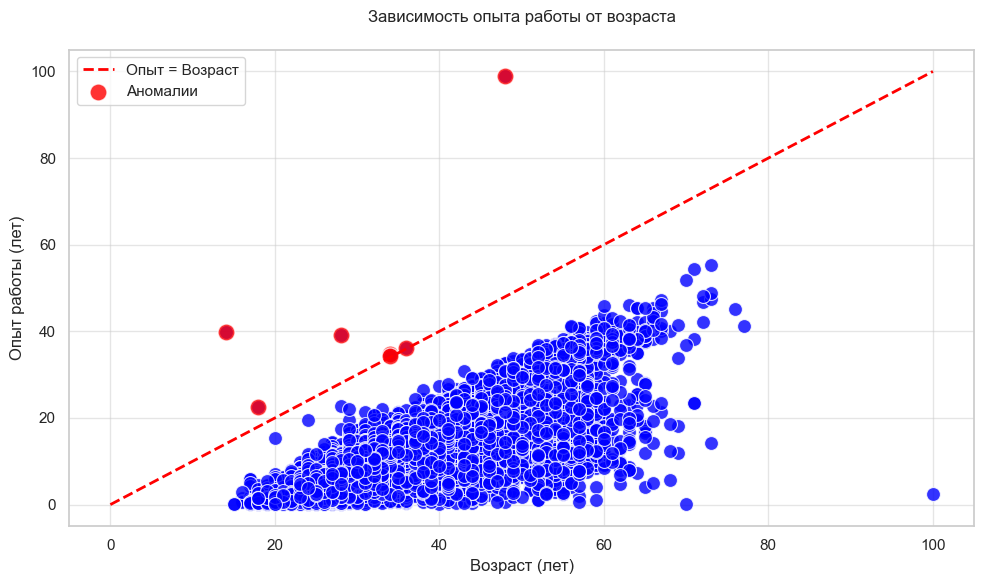

In [14]:
# ваш код здесь
# Переводим опыт работы из месяцев в года
hh['Опыт работы (год)'] = hh['Опыт работы (месяц)'] / 12

# Устанавливаем стиль seaborn
sns.set(style="whitegrid")

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Возраст", y="Опыт работы (год)", data=hh, color="blue", s=100, alpha=0.8)

# Добавление прямой, проходящей через точки (0, 0) и (100, 100)
plt.plot([0, 100], [0, 100], color="red", linestyle="--", linewidth=2, label="Опыт = Возраст")

# Выделение аномалий (точки выше или на прямой)
anomalies = hh[hh["Опыт работы (год)"] >= hh["Возраст"]]
sns.scatterplot(x=anomalies["Возраст"], y=anomalies["Опыт работы (год)"], color="red", s=150, alpha=0.8, label="Аномалии")

# Настройка диаграммы
plt.title("Зависимость опыта работы от возраста", pad=20)
plt.xlabel("Возраст (лет)")
plt.ylabel("Опыт работы (лет)")
plt.legend()
plt.grid(alpha=0.5)

# Показываем диаграмму
plt.tight_layout()
plt.show()

1. Большинство данных в пределах нормы, однако имеется 7 красных точек, которые наверняка являются аномалиями.
2. Кроме красных точек имеются аномалии, когда у людей старше 60 лет имеется околонулевой опыт.
3. Также аномалиями являются результаты, которые близки к красной линии, но ее не пересекают. Например, 3 точки возле 20 лет, когда у людей опыт чуть меньше их возраста. 

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


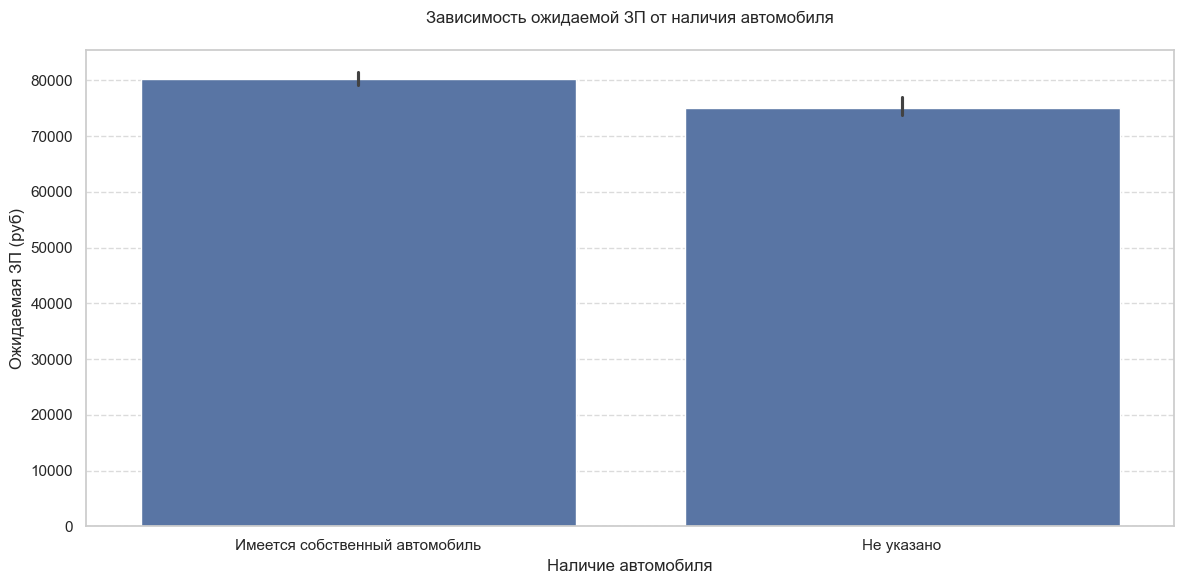

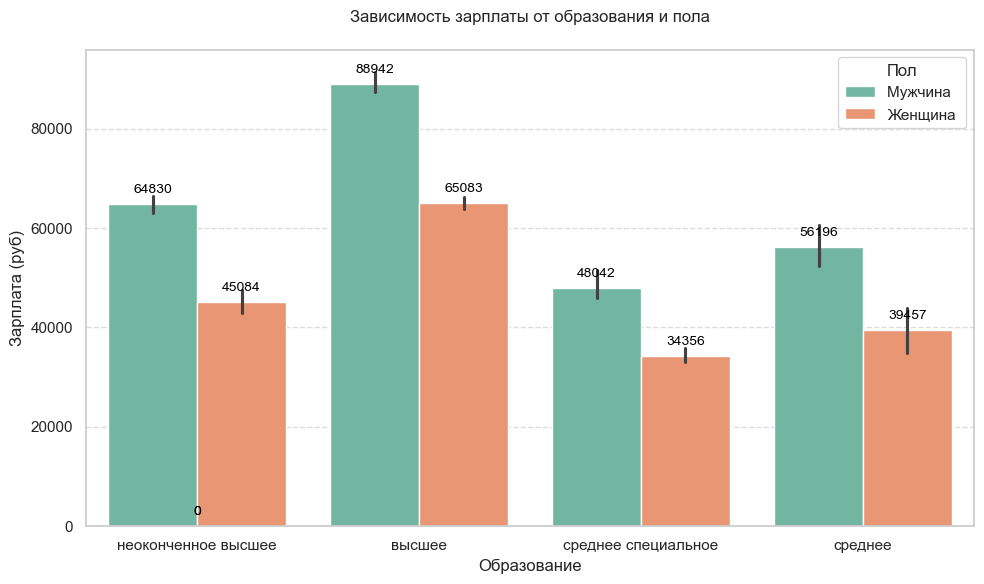

In [23]:
# ваш код здесь
# Устанавливаем стиль seaborn
sns.set(style="whitegrid")

# Построение боксплота
plt.figure(figsize=(12, 6))
sns.barplot(x="Авто", y="ЗП (руб)", data=hh)

# Настройка диаграммы
plt.title("Зависимость ожидаемой ЗП от наличия автомобиля", pad=20)
plt.xlabel("Наличие автомобиля")
plt.ylabel("Ожидаемая ЗП (руб)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Показываем диаграмму
plt.tight_layout()
plt.show()

# Устанавливаем стиль seaborn
sns.set(style="whitegrid")

# Построение группированной столбчатой диаграммы
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Образование", y="ЗП (руб)", hue="Пол", data=hh, palette="Set2")

# Добавляем аннотации (значения над столбцами)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="center", 
                xytext=(0, 10), 
                textcoords="offset points",
                fontsize=10, color="black")

# Настройка диаграммы
plt.title("Зависимость зарплаты от образования и пола", pad=20)
plt.xlabel("Образование")
plt.ylabel("Зарплата (руб)")
plt.legend(title="Пол", loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Показываем диаграмму
plt.tight_layout()
plt.show()


1. Зарплатные ожидания у кандидатов с собственным автомобилем чуть выше чем у тех у кого наличие автомобиля не указано
2. Есть гендерный разрыв в оплате труда вне зависимости от уровня образования; зарплаты мужчин выше женщин.
3. Самые высокие ЗП вне зависимости от пола у людей с высшим образованием, самые низкие ЗП также вне зависимости от пола со средним специальным образованием. 
4. Зарплаты у женщин с высшим образованием чуть выше чем у мужчин с неоконченным высшим, но зарплаты женщин с неоконченным высшим ниже чем со средним и средним специальным. 

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [69]:
# Создаем копию исходного датафрейма hh для очистки данных
clear_df = hh
# Метод shape[0] возвращает количество строк в датафрейме, содержащем только дубликаты
count = clear_df[clear_df.duplicated()].shape[0]
# Удаляем дубликаты из датафрейма
clear_df.drop_duplicates(inplace=True)
print(count)

161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [70]:
# Считаем количество пропущенных значений  в каждом столбце
cols_null_count = hh.isna().sum()
# Выбираем столбцы, в которых есть хотя бы одно пропущенное значение
cols_with_null = cols_null_count[cols_null_count>0]
# Показываем названия столбцов с пропущенными значениями и их количество
cols_with_null

Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Опыт работы (месяц)                168
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [71]:
# Удаляем строки с пропущенными значениями в столбцах 'Последнее/нынешнее место работы' и 'Последняя/нынешняя должность'
clear_df = hh.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
# Заполняем пропущенные значения в столбце 'Опыт работы (месяц)' медианой этого столбца
clear_df = hh.fillna(value={'Опыт работы (месяц)':clear_df['Опыт работы (месяц)'].median()})
print(round(clear_df['Опыт работы (месяц)'].mean(), 0))

114.0


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [72]:
# Сохраняем количество строк в DataFrame перед фильтрацией
bef = clear_df.shape[0]
# Оставляем только те строки, в которых значение 'ЗП (руб)' находится в диапазоне от 1000 до 1000000 включительно
clear_df = clear_df[(clear_df['ЗП (руб)'] <= 1000000) & (clear_df['ЗП (руб)'] >= 1000)]
# Сохраняем количество строк в DataFrame после фильтрации
aft = clear_df.shape[0]
print(bef - aft)

89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [73]:
# Сохраняем количество строк в DataFrame перед фильтрацией
shape_with_drops = clear_df.shape[0]
# Удаляем выбросы
clear_df = clear_df[clear_df['Опыт работы (месяц)'] / 12 <= clear_df['Возраст']]
shape_without_drops = clear_df.shape[0]
# Определяем число выбросов
print(shape_with_drops - shape_without_drops)

7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

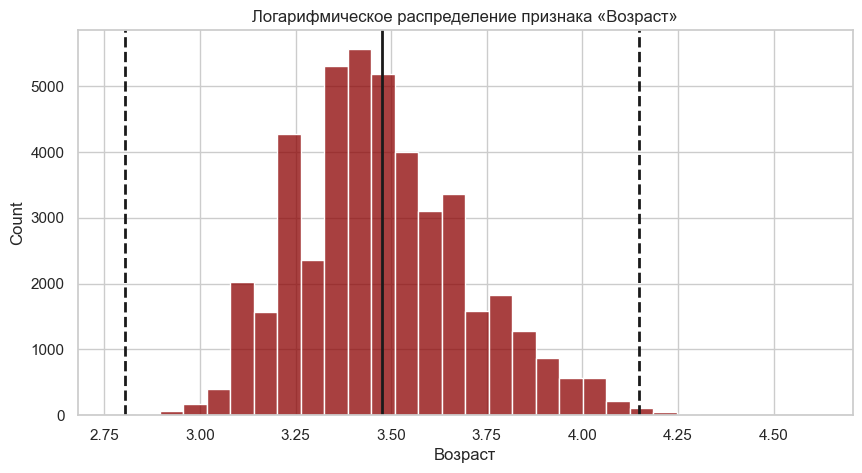

In [75]:
# Прологарифмировать значения возрастов соискателей
ages_log = np.log(clear_df['Возраст'] + 1)

# Построить гистограмму
plt.figure(figsize=(10, 5))
plt.title("Логарифмическое распределение признака «Возраст»")
ax = sns.histplot(
    data=ages_log,
    bins=30,
    color="darkred" 
)

# Добавить границы интервала
ax.axvline(ages_log.mean() - 3 * ages_log.std(), color='k', lw=2, ls='--')
ax.axvline(ages_log.mean() + 3 * ages_log.std(), color='k', lw=2, ls='--')

# Добавить моду
ax.axvline(ages_log.mean(), color='k', lw=2)

plt.show()

Количество выбросов 3
